In [488]:
import numpy as np
import pandas as pd

In [489]:
##Importação dos dados de treino

In [490]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [491]:
##Remoção de colunas inteiramente preenchidas por NaN

In [492]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [493]:
##Introdução do cabeçalho do data frame

In [494]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [495]:
##Geração de Histogramas e seleção de variáveis

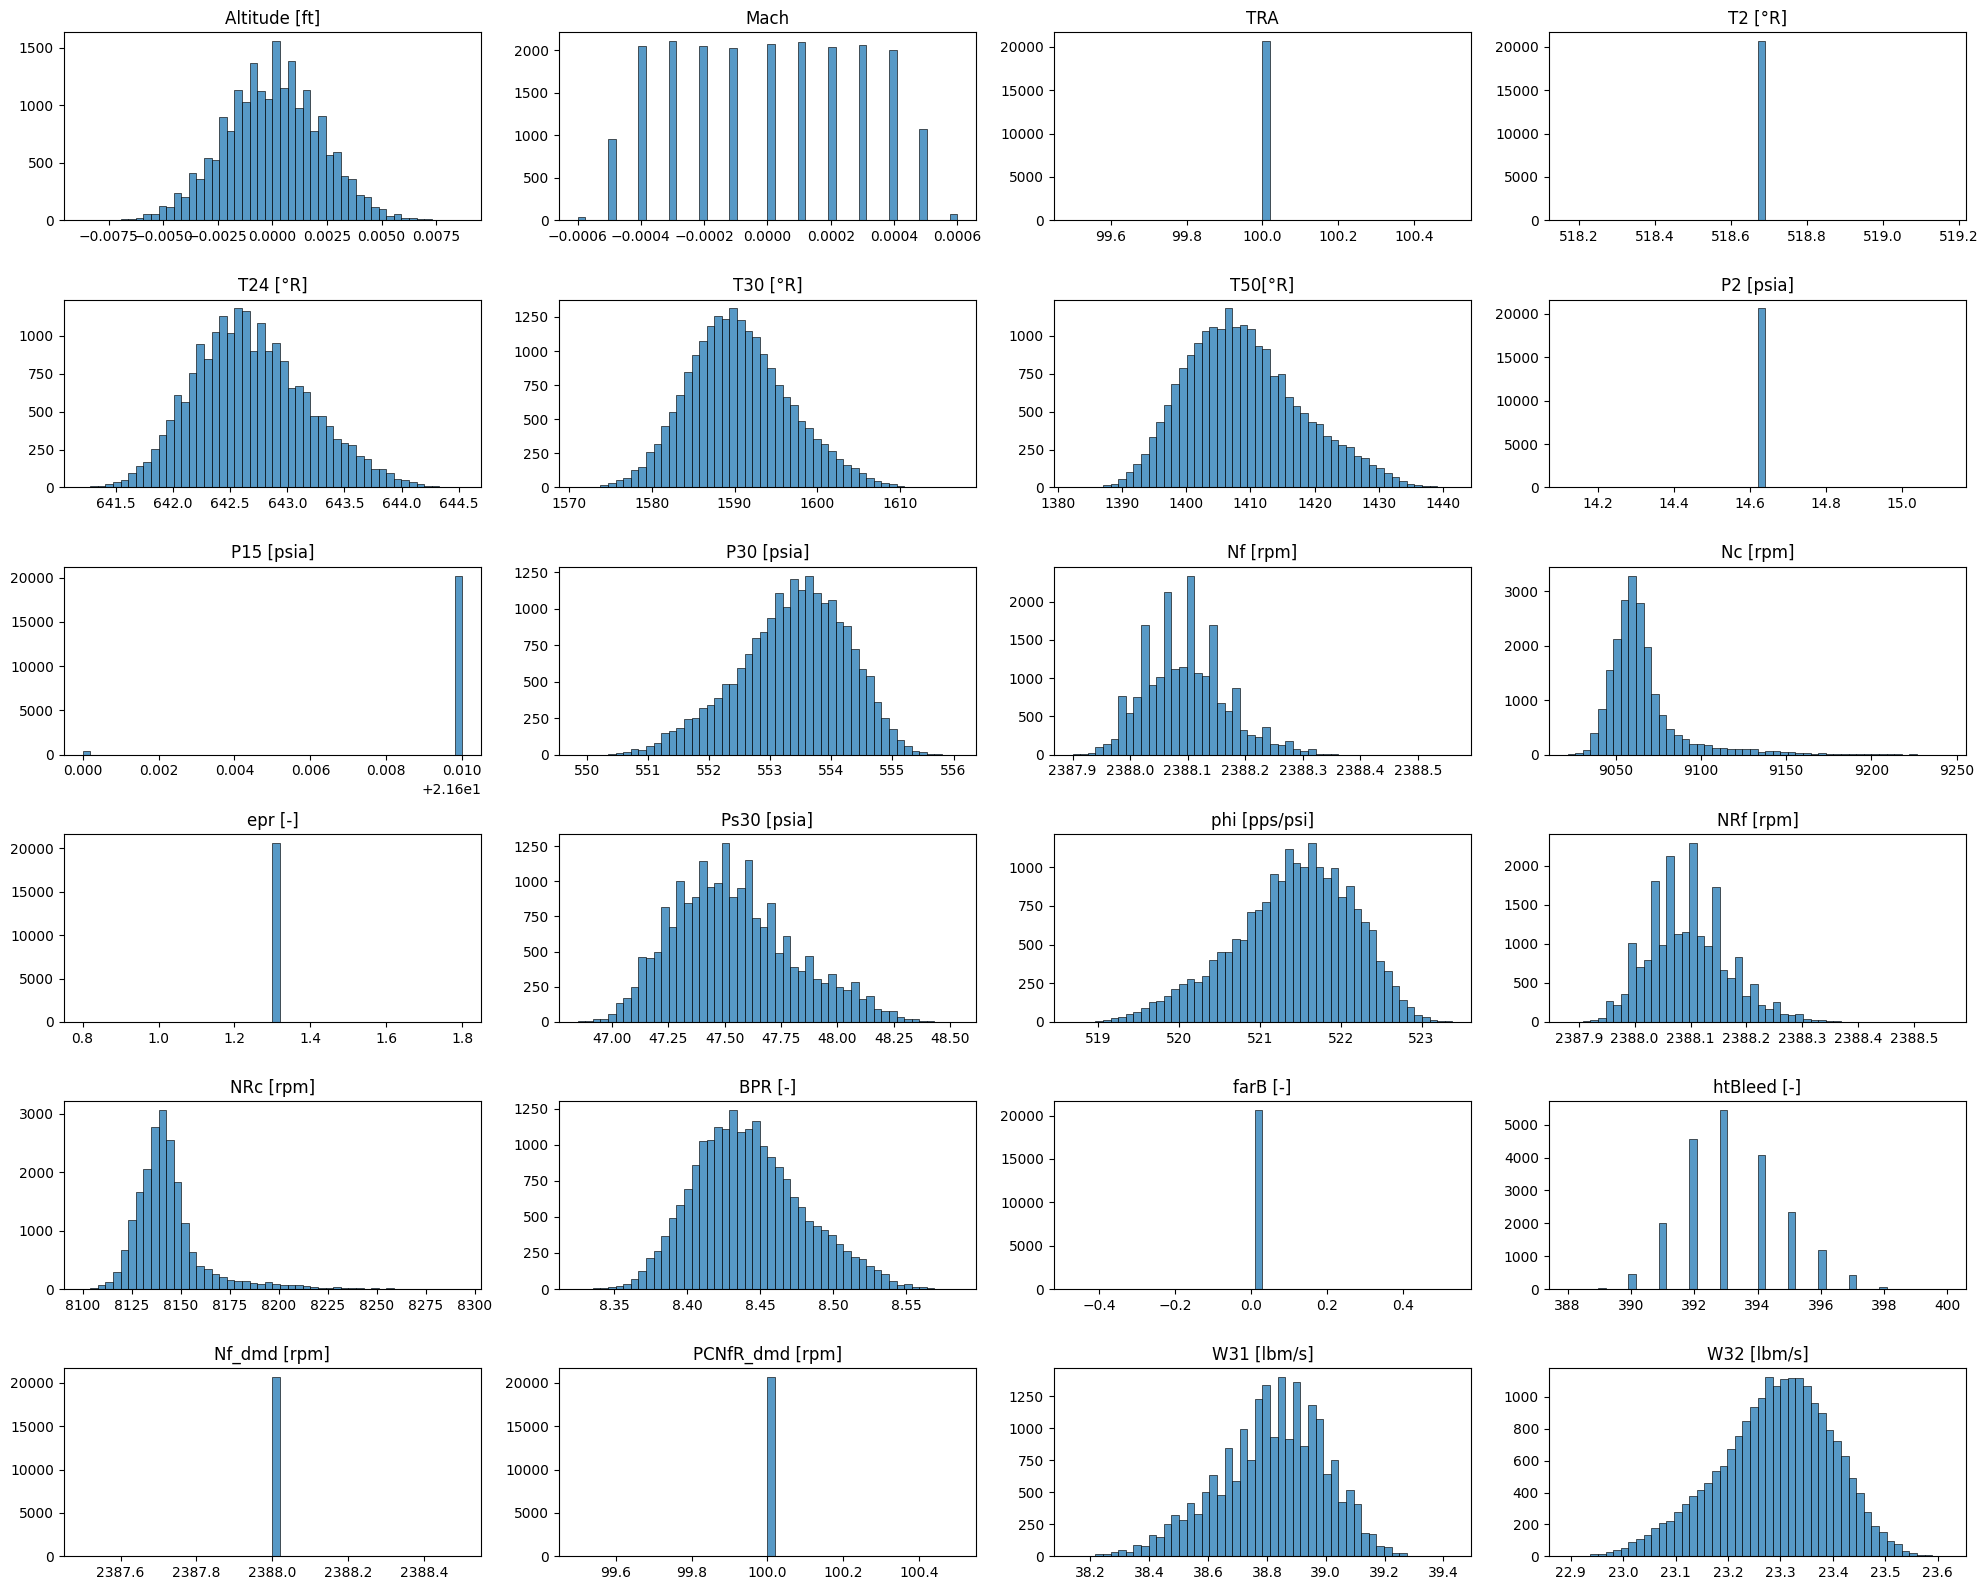

In [496]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [497]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [498]:
##Normalização

In [499]:
from sklearn.preprocessing import MinMaxScaler

In [500]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [501]:
##Definição dos targets para regressão e classificação nos dados de treino

In [502]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [503]:
##Visualização de um ciclo de vida de um motor

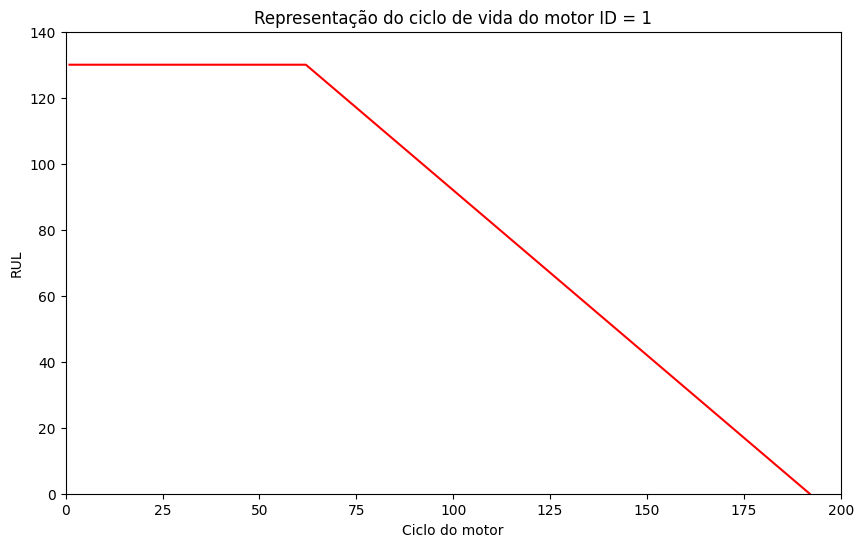

In [504]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [505]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [506]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [507]:
##Criação das janelas de tempo para dados de treino e de teste

In [508]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [509]:
##Separação das variáveis de treino e teste

In [510]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [511]:
##Criação do modelo LSTM

In [512]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [513]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 3458.0417 - mean_absolute_error: 48.4565 - mean_squared_error: 3458.0417

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 2102.8269 - mean_absolute_error: 37.5256 - mean_squared_error: 2102.8269 - val_loss: 693.5490 - val_mean_absolute_error: 22.2904 - val_mean_squared_error: 693.5489
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 899.7899 - mean_absolute_error: 24.1747 - mean_squared_error: 899.7899

71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - loss: 852.2650 - mean_absolute_error: 23.3232 - mean_squared_error: 852.2650 - val_loss: 559.8702 - val_mean_absolute_error: 19.0992 - val_mean_squared_error: 559.8702
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 676.6769 - mean_absolute_error: 20.3067 - mean_squared_error: 676.6769

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 668.3712 - mean_absolute_error: 20.1183 - mean_squared_error: 668.3712 - val_loss: 444.4757 - val_mean_absolute_error: 17.0756 - val_mean_squared_error: 444.4757
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 560.1869 - mean_absolute_error: 18.3058 - mean_squared_error: 560.1869

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 220ms/step - loss: 539.3790 - mean_absolute_error: 17.8968 - mean_squared_error: 539.3790 - val_loss: 312.1258 - val_mean_absolute_error: 13.8332 - val_mean_squared_error: 312.1258
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 496.2198 - mean_absolute_error: 17.2736 - mean_squared_error: 496.2198

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - loss: 477.9627 - mean_absolute_error: 16.9202 - mean_squared_error: 477.9627 - val_loss: 366.2933 - val_mean_absolute_error: 15.2722 - val_mean_squared_error: 366.2933
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 436.7173 - mean_absolute_error: 16.1433 - mean_squared_error: 436.7173

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - loss: 432.4689 - mean_absolute_error: 16.0052 - mean_squared_error: 432.4689 - val_loss: 557.0236 - val_mean_absolute_error: 18.8357 - val_mean_squared_error: 557.0236
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 398.5794 - mean_absolute_error: 15.4206 - mean_squared_error: 398.5794

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 398.2399 - mean_absolute_error: 15.3233 - mean_squared_error: 398.2399 - val_loss: 282.2332 - val_mean_absolute_error: 13.0085 - val_mean_squared_error: 282.2332
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 366.8879 - mean_absolute_error: 14.6110 - mean_squared_error: 366.8880

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - loss: 375.3417 - mean_absolute_error: 14.8048 - mean_squared_error: 375.3417 - val_loss: 237.3421 - val_mean_absolute_error: 11.7448 - val_mean_squared_error: 237.3421
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 350.3082 - mean_absolute_error: 14.1474 - mean_squared_error: 350.3082

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - loss: 356.5008 - mean_absolute_error: 14.2922 - mean_squared_error: 356.5008 - val_loss: 243.1650 - val_mean_absolute_error: 11.4276 - val_mean_squared_error: 243.1650
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 343.5936 - mean_absolute_error: 14.1206 - mean_squared_error: 343.5936

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 346.5982 - mean_absolute_error: 14.1195 - mean_squared_error: 346.5982 - val_loss: 250.8930 - val_mean_absolute_error: 11.6375 - val_mean_squared_error: 250.8930
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 339.2010 - mean_absolute_error: 13.8996 - mean_squared_error: 339.2010

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 262ms/step - loss: 332.5804 - mean_absolute_error: 13.7826 - mean_squared_error: 332.5804 - val_loss: 312.5089 - val_mean_absolute_error: 13.5002 - val_mean_squared_error: 312.5089
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 337.7833 - mean_absolute_error: 13.9659 - mean_squared_error: 337.7833

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - loss: 331.2236 - mean_absolute_error: 13.7936 - mean_squared_error: 331.2236 - val_loss: 256.4837 - val_mean_absolute_error: 11.9916 - val_mean_squared_error: 256.4837
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 297.7299 - mean_absolute_error: 13.0937 - mean_squared_error: 297.7299

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 310.5047 - mean_absolute_error: 13.3077 - mean_squared_error: 310.5047 - val_loss: 228.4066 - val_mean_absolute_error: 11.8555 - val_mean_squared_error: 228.4066
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 309.5590 - mean_absolute_error: 13.2414 - mean_squared_error: 309.5590

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 314.0800 - mean_absolute_error: 13.3318 - mean_squared_error: 314.0800 - val_loss: 218.1111 - val_mean_absolute_error: 10.9091 - val_mean_squared_error: 218.1111
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 301.2678 - mean_absolute_error: 13.0969 - mean_squared_error: 301.2678

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 305.1031 - mean_absolute_error: 13.1751 - mean_squared_error: 305.1031 - val_loss: 232.4139 - val_mean_absolute_error: 10.5969 - val_mean_squared_error: 232.4139
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 298.5744 - mean_absolute_error: 13.0174 - mean_squared_error: 298.5744

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 296.1816 - mean_absolute_error: 12.9436 - mean_squared_error: 296.1816 - val_loss: 281.1583 - val_mean_absolute_error: 11.5569 - val_mean_squared_error: 281.1583
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 292.5368 - mean_absolute_error: 12.9112 - mean_squared_error: 292.5368

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 288.2249 - mean_absolute_error: 12.8155 - mean_squared_error: 288.2249 - val_loss: 292.1852 - val_mean_absolute_error: 13.2239 - val_mean_squared_error: 292.1852
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 291.3282 - mean_absolute_error: 12.8699 - mean_squared_error: 291.3282

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 290.0618 - mean_absolute_error: 12.8271 - mean_squared_error: 290.0618 - val_loss: 211.3577 - val_mean_absolute_error: 11.1176 - val_mean_squared_error: 211.3577
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 290.5728 - mean_absolute_error: 12.8287 - mean_squared_error: 290.5728

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 284.8431 - mean_absolute_error: 12.6839 - mean_squared_error: 284.8431 - val_loss: 210.4334 - val_mean_absolute_error: 10.0540 - val_mean_squared_error: 210.4334
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 280.3119 - mean_absolute_error: 12.5292 - mean_squared_error: 280.3119

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 280.6471 - mean_absolute_error: 12.5720 - mean_squared_error: 280.6471 - val_loss: 240.5181 - val_mean_absolute_error: 12.0221 - val_mean_squared_error: 240.5181
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 267.3101 - mean_absolute_error: 12.2557 - mean_squared_error: 267.3101

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 272.2176 - mean_absolute_error: 12.3477 - mean_squared_error: 272.2176 - val_loss: 228.3438 - val_mean_absolute_error: 10.7353 - val_mean_squared_error: 228.3439
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 268.8720 - mean_absolute_error: 12.3062 - mean_squared_error: 268.8720

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - loss: 271.7036 - mean_absolute_error: 12.3511 - mean_squared_error: 271.7036 - val_loss: 224.4766 - val_mean_absolute_error: 11.5965 - val_mean_squared_error: 224.4766
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 272.7215 - mean_absolute_error: 12.3483 - mean_squared_error: 272.7215

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 268.0030 - mean_absolute_error: 12.2256 - mean_squared_error: 268.0030 - val_loss: 250.0774 - val_mean_absolute_error: 10.9572 - val_mean_squared_error: 250.0774
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 261.0436 - mean_absolute_error: 12.1748 - mean_squared_error: 261.0436

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 260.5755 - mean_absolute_error: 12.1043 - mean_squared_error: 260.5755 - val_loss: 200.6409 - val_mean_absolute_error: 9.9607 - val_mean_squared_error: 200.6409
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 266.2455 - mean_absolute_error: 12.1503 - mean_squared_error: 266.2455

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 257.6785 - mean_absolute_error: 11.9754 - mean_squared_error: 257.6785 - val_loss: 354.6651 - val_mean_absolute_error: 13.5787 - val_mean_squared_error: 354.6651
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 277.0586 - mean_absolute_error: 12.4688 - mean_squared_error: 277.0586

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 259.5840 - mean_absolute_error: 12.0999 - mean_squared_error: 259.5840 - val_loss: 231.4584 - val_mean_absolute_error: 10.2219 - val_mean_squared_error: 231.4584
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 254.8580 - mean_absolute_error: 11.8148 - mean_squared_error: 254.8580

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - loss: 255.5924 - mean_absolute_error: 11.8718 - mean_squared_error: 255.5924 - val_loss: 186.7593 - val_mean_absolute_error: 9.6730 - val_mean_squared_error: 186.7593
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 249.9552 - mean_absolute_error: 11.7803 - mean_squared_error: 249.9552

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 248.8770 - mean_absolute_error: 11.7642 - mean_squared_error: 248.8770 - val_loss: 285.8752 - val_mean_absolute_error: 12.0172 - val_mean_squared_error: 285.8752
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 264.1347 - mean_absolute_error: 12.1003 - mean_squared_error: 264.1347

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 253.6956 - mean_absolute_error: 11.8841 - mean_squared_error: 253.6956 - val_loss: 185.8162 - val_mean_absolute_error: 10.1201 - val_mean_squared_error: 185.8162
Epoch 30/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 239.0692 - mean_absolute_error: 11.4475 - mean_squared_error: 239.0692

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 245.5334 - mean_absolute_error: 11.6585 - mean_squared_error: 245.5334 - val_loss: 186.9879 - val_mean_absolute_error: 9.9970 - val_mean_squared_error: 186.9879


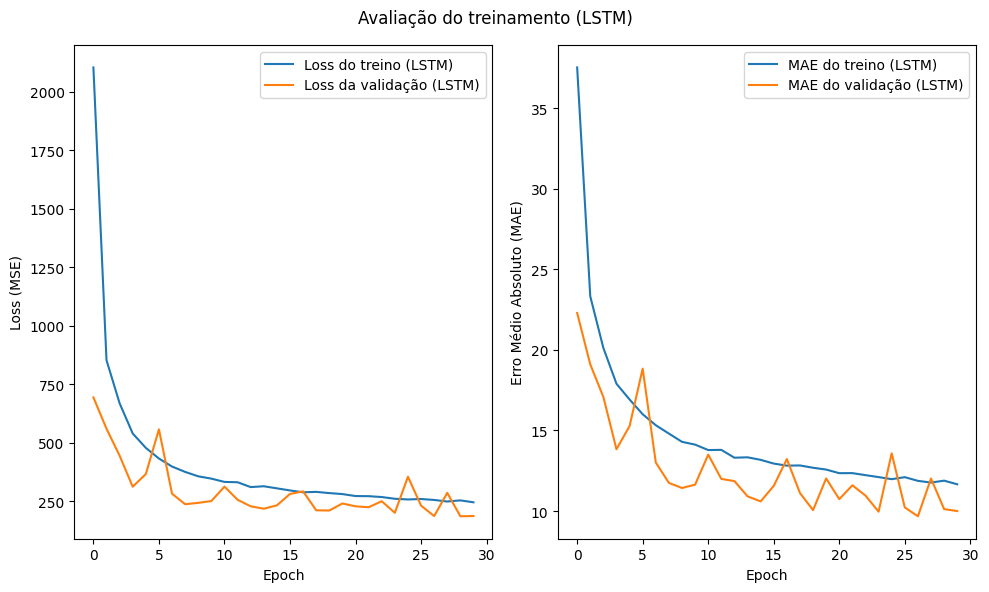

In [514]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [515]:
##Testando o modelo com os dados de teste 

In [516]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [517]:
##Avaliando o modelo

232.58263105593923
15.25
0.12777741195030967
11.577608410635852
0.7651476827571349
Tempo de 412.737299s


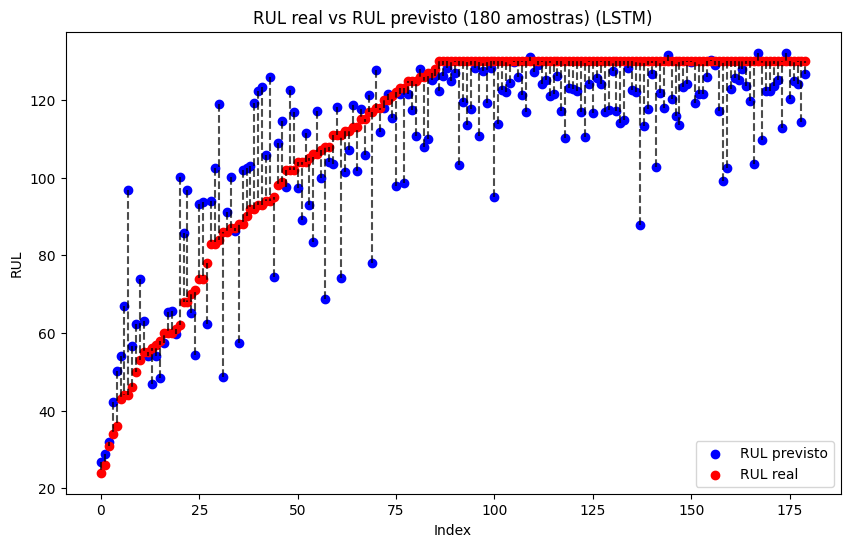

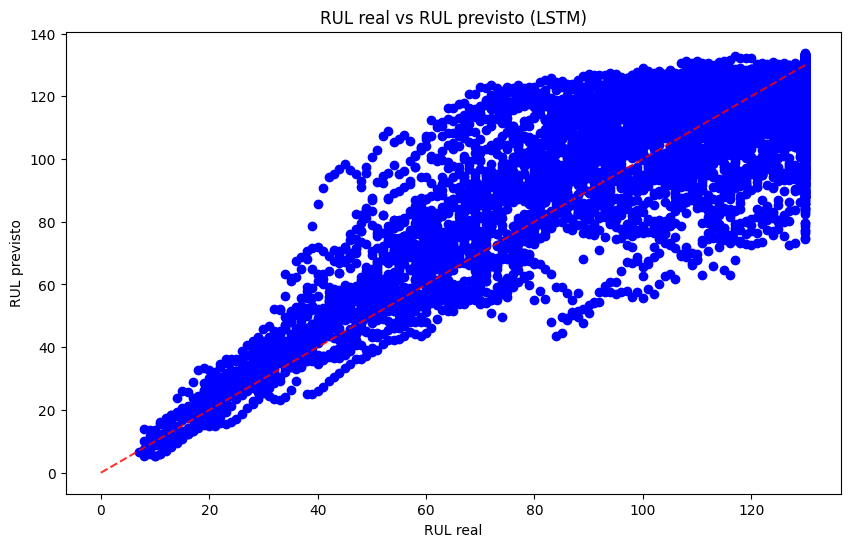

In [518]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [519]:
##Criando modelo BiLSTM

In [520]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [521]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5376.2554 - mean_absolute_error: 62.0291 - mean_squared_error: 5376.2554

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 3582.8240 - mean_absolute_error: 50.3361 - mean_squared_error: 3582.8240 - val_loss: 1894.3455 - val_mean_absolute_error: 38.6993 - val_mean_squared_error: 1894.3455
Epoch 2/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1742.0492 - mean_absolute_error: 36.6659 - mean_squared_error: 1742.0492

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 1397.0552 - mean_absolute_error: 31.9942 - mean_squared_error: 1397.0552 - val_loss: 705.2719 - val_mean_absolute_error: 21.5889 - val_mean_squared_error: 705.2719
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 740.6818 - mean_absolute_error: 22.0267 - mean_squared_error: 740.6818

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 711.9865 - mean_absolute_error: 21.4488 - mean_squared_error: 711.9865 - val_loss: 487.9196 - val_mean_absolute_error: 18.6343 - val_mean_squared_error: 487.9196
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 629.5626 - mean_absolute_error: 19.8650 - mean_squared_error: 629.5626

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 620.2635 - mean_absolute_error: 19.6410 - mean_squared_error: 620.2635 - val_loss: 413.8241 - val_mean_absolute_error: 16.4876 - val_mean_squared_error: 413.8241
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 562.9041 - mean_absolute_error: 18.6842 - mean_squared_error: 562.9041

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 547.2917 - mean_absolute_error: 18.2574 - mean_squared_error: 547.2917 - val_loss: 1229.1595 - val_mean_absolute_error: 26.7565 - val_mean_squared_error: 1229.1595
Epoch 6/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 549.1650 - mean_absolute_error: 18.0786 - mean_squared_error: 549.1650

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 507.5136 - mean_absolute_error: 17.5256 - mean_squared_error: 507.5136 - val_loss: 452.3647 - val_mean_absolute_error: 15.8621 - val_mean_squared_error: 452.3647
Epoch 7/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 466.5779 - mean_absolute_error: 16.6514 - mean_squared_error: 466.5779

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 465.1629 - mean_absolute_error: 16.7079 - mean_squared_error: 465.1629 - val_loss: 517.1402 - val_mean_absolute_error: 17.5428 - val_mean_squared_error: 517.1401
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 464.9220 - mean_absolute_error: 16.7593 - mean_squared_error: 464.9220

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 454.6894 - mean_absolute_error: 16.5756 - mean_squared_error: 454.6894 - val_loss: 288.9506 - val_mean_absolute_error: 13.1817 - val_mean_squared_error: 288.9506
Epoch 9/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 415.5016 - mean_absolute_error: 15.8094 - mean_squared_error: 415.5016

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 416.1524 - mean_absolute_error: 15.8083 - mean_squared_error: 416.1524 - val_loss: 279.0814 - val_mean_absolute_error: 13.1136 - val_mean_squared_error: 279.0814
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 400.9870 - mean_absolute_error: 15.5162 - mean_squared_error: 400.9870

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 409.0680 - mean_absolute_error: 15.6963 - mean_squared_error: 409.0680 - val_loss: 320.5042 - val_mean_absolute_error: 13.3699 - val_mean_squared_error: 320.5042
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 394.6420 - mean_absolute_error: 15.3380 - mean_squared_error: 394.6420

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 394.6356 - mean_absolute_error: 15.3614 - mean_squared_error: 394.6357 - val_loss: 317.0533 - val_mean_absolute_error: 13.5397 - val_mean_squared_error: 317.0533
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 379.7140 - mean_absolute_error: 14.9594 - mean_squared_error: 379.7140

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 377.9784 - mean_absolute_error: 14.9640 - mean_squared_error: 377.9784 - val_loss: 306.0421 - val_mean_absolute_error: 12.5178 - val_mean_squared_error: 306.0421
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 372.4243 - mean_absolute_error: 14.8513 - mean_squared_error: 372.4243

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 373.0441 - mean_absolute_error: 14.8578 - mean_squared_error: 373.0441 - val_loss: 286.9583 - val_mean_absolute_error: 13.2908 - val_mean_squared_error: 286.9583
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 371.7764 - mean_absolute_error: 15.0050 - mean_squared_error: 371.7764

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 366.2711 - mean_absolute_error: 14.7932 - mean_squared_error: 366.2711 - val_loss: 228.3827 - val_mean_absolute_error: 11.4743 - val_mean_squared_error: 228.3827
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 348.9727 - mean_absolute_error: 14.3211 - mean_squared_error: 348.9727

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 351.1226 - mean_absolute_error: 14.3684 - mean_squared_error: 351.1226 - val_loss: 249.6567 - val_mean_absolute_error: 11.9145 - val_mean_squared_error: 249.6567
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 357.5840 - mean_absolute_error: 14.5349 - mean_squared_error: 357.5840

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 351.7425 - mean_absolute_error: 14.3905 - mean_squared_error: 351.7425 - val_loss: 307.0080 - val_mean_absolute_error: 13.2061 - val_mean_squared_error: 307.0080
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 359.7079 - mean_absolute_error: 14.4250 - mean_squared_error: 359.7079

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 346.5312 - mean_absolute_error: 14.1873 - mean_squared_error: 346.5312 - val_loss: 230.1307 - val_mean_absolute_error: 11.3020 - val_mean_squared_error: 230.1307
Epoch 18/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 349.9338 - mean_absolute_error: 14.2640 - mean_squared_error: 349.9338

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 342.9613 - mean_absolute_error: 14.1211 - mean_squared_error: 342.9613 - val_loss: 225.8698 - val_mean_absolute_error: 11.4715 - val_mean_squared_error: 225.8698
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 323.0880 - mean_absolute_error: 13.6853 - mean_squared_error: 323.0880

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 331.4525 - mean_absolute_error: 13.8653 - mean_squared_error: 331.4525 - val_loss: 214.8967 - val_mean_absolute_error: 10.8615 - val_mean_squared_error: 214.8967
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 328.3641 - mean_absolute_error: 13.8327 - mean_squared_error: 328.3641

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 327.9291 - mean_absolute_error: 13.8342 - mean_squared_error: 327.9291 - val_loss: 240.9746 - val_mean_absolute_error: 11.6300 - val_mean_squared_error: 240.9746
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 329.7428 - mean_absolute_error: 13.8216 - mean_squared_error: 329.7428

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 329.0736 - mean_absolute_error: 13.8079 - mean_squared_error: 329.0736 - val_loss: 225.7005 - val_mean_absolute_error: 11.4930 - val_mean_squared_error: 225.7005
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 303.7564 - mean_absolute_error: 13.2804 - mean_squared_error: 303.7564

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 307.9160 - mean_absolute_error: 13.3883 - mean_squared_error: 307.9160 - val_loss: 211.6195 - val_mean_absolute_error: 10.6026 - val_mean_squared_error: 211.6195
Epoch 23/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 332.0044 - mean_absolute_error: 13.8519 - mean_squared_error: 332.0044

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 322.1194 - mean_absolute_error: 13.6250 - mean_squared_error: 322.1194 - val_loss: 209.6335 - val_mean_absolute_error: 10.6600 - val_mean_squared_error: 209.6335
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 320.2409 - mean_absolute_error: 13.6262 - mean_squared_error: 320.2409

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 319.7412 - mean_absolute_error: 13.6022 - mean_squared_error: 319.7412 - val_loss: 258.4111 - val_mean_absolute_error: 11.6891 - val_mean_squared_error: 258.4111
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 311.7935 - mean_absolute_error: 13.3843 - mean_squared_error: 311.7935

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 308.8679 - mean_absolute_error: 13.3437 - mean_squared_error: 308.8679 - val_loss: 337.6286 - val_mean_absolute_error: 13.2232 - val_mean_squared_error: 337.6286
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 321.7290 - mean_absolute_error: 13.6158 - mean_squared_error: 321.7290

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 318.7202 - mean_absolute_error: 13.5669 - mean_squared_error: 318.7202 - val_loss: 259.2512 - val_mean_absolute_error: 11.4070 - val_mean_squared_error: 259.2512
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 313.8011 - mean_absolute_error: 13.5311 - mean_squared_error: 313.8011

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 304.2226 - mean_absolute_error: 13.2883 - mean_squared_error: 304.2226 - val_loss: 209.2247 - val_mean_absolute_error: 10.5502 - val_mean_squared_error: 209.2247
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 299.9640 - mean_absolute_error: 13.1752 - mean_squared_error: 299.9640

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 295.8443 - mean_absolute_error: 13.0532 - mean_squared_error: 295.8443 - val_loss: 288.4250 - val_mean_absolute_error: 12.8649 - val_mean_squared_error: 288.4250
Epoch 29/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 305.2379 - mean_absolute_error: 13.2108 - mean_squared_error: 305.2379

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 298.2814 - mean_absolute_error: 13.0536 - mean_squared_error: 298.2814 - val_loss: 237.4113 - val_mean_absolute_error: 10.9589 - val_mean_squared_error: 237.4113
Epoch 30/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 311.5541 - mean_absolute_error: 13.3335 - mean_squared_error: 311.5541

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 306.4618 - mean_absolute_error: 13.2267 - mean_squared_error: 306.4618 - val_loss: 208.6077 - val_mean_absolute_error: 10.6281 - val_mean_squared_error: 208.6077


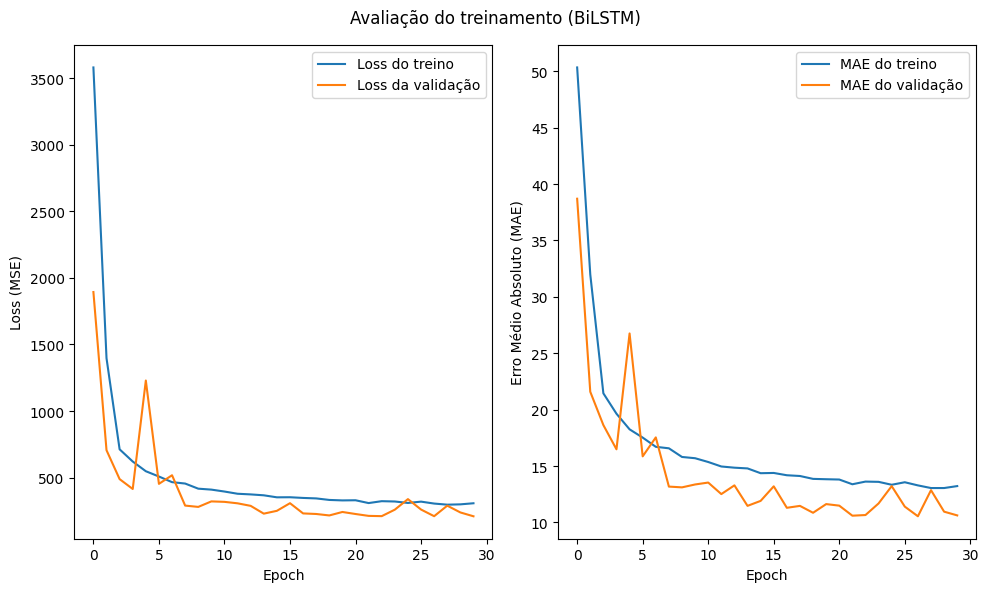

In [522]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [523]:
##Testando o modelo com os dados de teste

In [524]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [525]:
##Avaliando o modelo

238.11478834709612
15.43
0.13530415255770334
11.871732811686478
0.7595615392292128
Tempo de 156.817144s


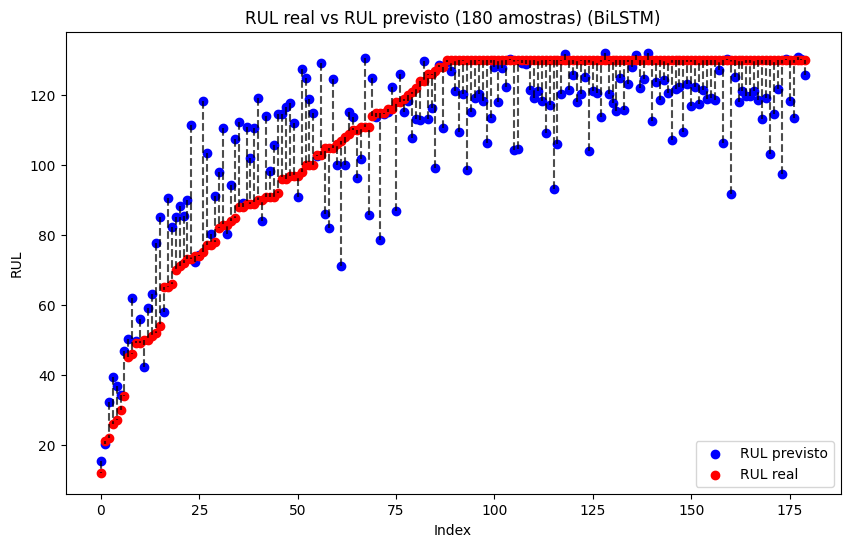

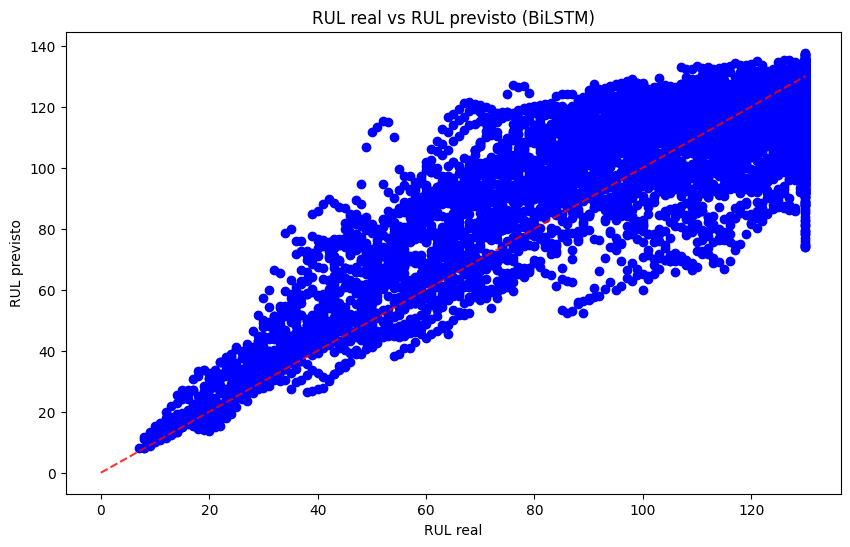

In [526]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()